In [0]:
%pip install dtreeviz

Python interpreter will be restarted.
Requirement already satisfied: dtreeviz in /databricks/python3/lib/python3.8/site-packages (1.3.7)
Requirement already satisfied: pytest in /databricks/python3/lib/python3.8/site-packages (from dtreeviz) (7.1.3)
Requirement already satisfied: colour in /databricks/python3/lib/python3.8/site-packages (from dtreeviz) (0.1.5)
Requirement already satisfied: graphviz>=0.9 in /databricks/python3/lib/python3.8/site-packages (from dtreeviz) (0.20.1)
Requirement already satisfied: matplotlib in /databricks/python3/lib/python3.8/site-packages (from dtreeviz) (3.4.2)
Requirement already satisfied: numpy in /databricks/python3/lib/python3.8/site-packages (from dtreeviz) (1.20.1)
Requirement already satisfied: pandas in /databricks/python3/lib/python3.8/site-packages (from dtreeviz) (1.2.4)
Requirement already satisfied: scikit-learn in /databricks/python3/lib/python3.8/site-packages (from dtreeviz) (0.24.1)
Requirement already satisfied: python-dateutil>=2.7 in /databricks/python3/lib/python3.8/site-packages (from matplotlib->dtreeviz) (2.8.1)
Requirement already satisfied: pillow>=6.2.0 in /databricks/python3/lib/python3.8/site-packages (from matplotlib->dtreeviz) (8.2.0)
Requirement already satisfied: cycler>=0.10 in /databricks/python3/lib/python3.8/site-packages (from matplotlib->dtreeviz) (0.10.0)
Requirement already satisfied: kiwisolver>=1.0.1 in /databricks/python3/lib/python3.8/site-packages (from matplotlib->dtreeviz) (1.3.1)
Requirement already satisfied: pyparsing>=2.2.1 in /databricks/python3/lib/python3.8/site-packages (from matplotlib->dtreeviz) (2.4.7)
Requirement already satisfied: six in /databricks/python3/lib/python3.8/site-packages (from cycler>=0.10->matplotlib->dtreeviz) (1.15.0)
Requirement already satisfied: pytz>=2017.3 in /databricks/python3/lib/python3.8/site-packages (from pandas->dtreeviz) (2020.5)
Requirement already satisfied: tomli>=1.0.0 in /databricks/python3/lib/python3.8/site-packages (from pytest->dtreeviz) (2.0.1)
Requirement already satisfied: packaging in /databricks/python3/lib/python3.8/site-packages (from pytest->dtreeviz) (20.9)
Requirement already satisfied: iniconfig in /databricks/python3/lib/python3.8/site-packages (from pytest->dtreeviz) (1.1.1)
Requirement already satisfied: pluggy<2.0,>=0.12 in /databricks/python3/lib/python3.8/site-packages (from pytest->dtreeviz) (1.0.0)
Requirement already satisfied: py>=1.8.2 in /databricks/python3/lib/python3.8/site-packages (from pytest->dtreeviz) (1.11.0)
Requirement already satisfied: attrs>=19.2.0 in /databricks/python3/lib/python3.8/site-packages (from pytest->dtreeviz) (20.3.0)
Requirement already satisfied: joblib>=0.11 in /databricks/python3/lib/python3.8/site-packages (from scikit-learn->dtreeviz) (1.0.1)
Requirement already satisfied: scipy>=0.19.1 in /databricks/python3/lib/python3.8/site-packages (from scikit-learn->dtreeviz) (1.6.2)
Requirement already satisfied: threadpoolctl>=2.0.0 in /databricks/python3/lib/python3.8/site-packages (from scikit-learn->dtreeviz) (2.1.0)
Python interpreter will be restarted.

In [0]:
import graphviz

### ML model

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import pandas as pd
import pickle
from dtreeviz.trees import *

### Simplified functions

##### Add all the necessary functions for plotting and metric functions here

In [0]:
# PLOTTING THE ACTUALL VS PREDICTED TIME.
def actual_vs_predicted(index, actual, predicted, text="CompletionTime"):


    plt.scatter(index, actual,marker="D")
    plt.scatter(index,predicted, color="r",marker="*")
    plt.legend(["Actual", "Predicted"])
    plt.title("Actual versus Predicted values for {}".format(text))
    plt.xlabel("Index", fontsize=20)
    plt.ylabel("completionTime", fontsize=20)
    return plt.figure()

In [0]:
def saveModel(path, model):
    pickle.dump(model, open(path, 'wb'))

### Data Preprocessing

In [0]:
# XCa change /dbfs/FileStore/tables/TrainingDataSetCWOMongoDB18SEPRun2search5ShreeSave
data = pd.read_csv("/dbfs/FileStore/tables/19SEP_FULL_DATASET_WITH_INSERT_FILTER_QUERY.csv")

In [0]:
data

Out[6]:

,MongoClusterType,CloudProvider,RAM,CPUs,datavolume,shardingtype,indextype,querytype,responsetime,usagecost,df_name,Unnamed: 0,pricePerHr,pricePerS,Iops,Memory
0,flights-m200,Azure,256,64,100K,0,0,RowInsert,0.224690,0.002050,NaN,NaN,32.85,0.009125,1100,256
1,flights-m200,Azure,256,64,100K,0,1,RowInsert,0.218215,0.001991,NaN,NaN,32.85,0.009125,1100,256
2,flights-m200,Azure,256,64,100K,1,1,RowInsert,0.269145,0.002456,NaN,NaN,32.85,0.009125,1100,256
3,flights-m200,Azure,256,64,1M,0,0,RowInsert,0.262604,0.002396,NaN,NaN,32.85,0.009125,1100,256
4,flights-m200,Azure,256,64,1M,0,1,RowInsert,0.187346,0.001710,NaN,NaN,32.85,0.009125,1100,256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,flights-m80,Azure,128,32,100M,0,1,stringSearch_last_name,49.268069,0.270016,NaN,NaN,19.73,0.005481,1100,256
401,flights-m80,Azure,128,32,100M,0,0,stringSearch_last_name,44.073322,0.241546,NaN,NaN,19.73,0.005481,1100,256
402,flights-m80,Azure,128,32,100M,0,1,stringSearch_last_name,48.500510,0.265810,NaN,NaN,19.73,0.005481,1100,256
403,flights-m80,Azure,128,32,100M,0,0,stringSearch_last_name,44.762081,0.245321,NaN,NaN,19.73,0.005481,1100,256


In [0]:
 # The datavolume column has some strings which have to be converted into proper henc, the function

def dataVolumeConversion(val):
    
    if val[-1] == "K":
        return int(val[:-1])*1000
    if val[-1] == "M":
        return int(val[:-1])*1000000
 data.datavolume =  data.datavolume.apply(dataVolumeConversion)

In [0]:
cluster_type = {"flights-m10":0, 'flights-m20':1, 'flights-m50':2, 'flights-m80':3,
       'flights-m200':4}
data.MongoClusterType = data.MongoClusterType.map(lambda x:cluster_type[x])        # Mapping the cluster type from string to numeric category to train the model

In [0]:
#converitng the querytype from string to numeric
queryDict = {val:i for i, val in enumerate(data.querytype.unique())}
data.querytype = data.querytype.map(lambda x:queryDict[x])

print(queryDict)

{'RowInsert': 0, 'stringSearch_firstName': 1, 'stringSearch_last_name': 2}

In [0]:
#spillting the dataset 
X_data, y_data = data[["MongoClusterType", "RAM", "CPUs", "datavolume",'querytype','shardingtype', 'indextype', 'Memory', 'Iops']], data["responsetime"]
X_train, X_test, y_train, y_test = train_test_split( X_data, y_data, test_size=0.1, random_state=42)
#XCA remove iops and add querytype

### DECISION TREE REGRESSOR

In [0]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
import pandas as pd

In [0]:
# First predicting the time taken to do the write operation
regressor = DecisionTreeRegressor(random_state = 0, max_depth=7, criterion="mae") 
regressor.fit(X_train, y_train)
y_predict = regressor.predict(X_test)

Out[13]:

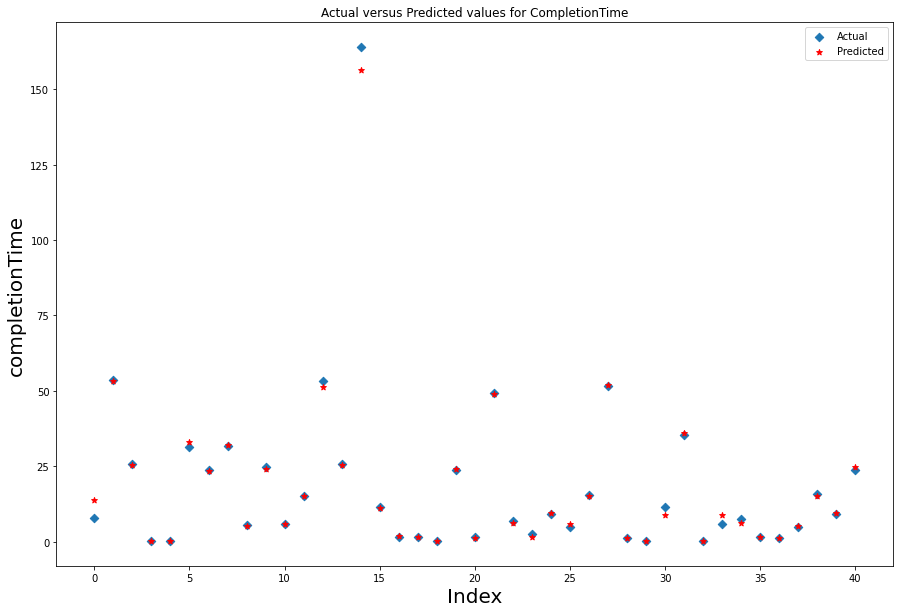

<Figure size 432x288 with 0 Axes>

In [0]:
fig = plt.figure(figsize=(15, 10))
actual_vs_predicted([i for i in range(len(y_test))], y_test, y_predict)

In [0]:
fig = plt.figure(figsize=(50,20))
tree.plot_tree(regressor, feature_names=X_data.columns, filled=True)

Out[14]:

In [0]:
mean_absolute_error(y_test, y_predict)

Out[15]: 0.8784160468636493

In [0]:
regressor.feature_importances_

Out[16]: array([0.00631837, 0.00810996, 0.03481059, 0.56095393, 0.16953256,
 0.00968469, 0.15366584, 0.05495778, 0.00196628])

In [0]:
path = "/dbfs/FileStore/ML_modles/decisionTree20Sep.sav"
saveModel(path, regressor)

In [0]:
viz = dtreeviz(regressor,
               X_train,
               y_train,
               target_name='responseTime',
               feature_names=X_train.columns)
              
viz.view()    

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.

--------------------------------------------------------------------------- 
 FileNotFoundError Traceback (most recent call last)
 /databricks/python/lib/python3.8/site-packages/graphviz/backend/execute.py in run_check (cmd, input_lines, encoding, quiet, **kwargs) 
 80 else : 
 ---> 81 proc = subprocess . run ( cmd , ** kwargs ) 
 82 except OSError as e : 

 /usr/lib/python3.8/subprocess.py in run (input, capture_output, timeout, check, *popenargs, **kwargs) 
 492 
 --> 493 with Popen ( * popenargs , ** kwargs ) as process : 
 494 try : 

 /usr/lib/python3.8/subprocess.py in __init__ (self, args, bufsize, executable, stdin, stdout, stderr, preexec_fn, close_fds, shell, cwd, env, universal_newlines, startupinfo, creationflags, restore_signals, start_new_session, pass_fds, encoding, errors, text) 
 857 
 --> 858 self._execute_child(args, executable, preexec_fn, close_fds,
 859 pass_fds , cwd , env , 

 /usr/lib/python3.8/subprocess.py in _execute_child (self, args, executable, preexec_fn, close_fds, pass_fds, cwd, env, startupinfo, creationflags, shell, p2cread, p2cwrite, c2pread, c2pwrite, errread, errwrite, restore_signals, start_new_session) 
 1703 err_msg = os . strerror ( errno_num ) 
 -> 1704 raise child_exception_type ( errno_num , err_msg , err_filename ) 
 1705 raise child_exception_type ( err_msg ) 

 FileNotFoundError : [Errno 2] No such file or directory: 'dot'

The above exception was the direct cause of the following exception:

 ExecutableNotFound Traceback (most recent call last)
 <command-2401795494862516> in <module> 
 5 feature_names=X_train.columns)
 6 
 ----> 7 viz . view ( ) 

 /databricks/python/lib/python3.8/site-packages/dtreeviz/trees.py in view (self) 
 56 
 57 def view ( self ) : 
 ---> 58 svgfilename = self . save_svg ( ) 
 59 graphviz . backend . view ( svgfilename ) 
 60 

 /databricks/python/lib/python3.8/site-packages/dtreeviz/trees.py in save_svg (self) 
 63 tmp = tempfile . gettempdir ( ) 
 64 svgfilename = os . path . join ( tmp , f"DTreeViz_{os.getpid()}.svg" ) 
 ---> 65 self . save ( svgfilename ) 
 66 return svgfilename
 67 

 /databricks/python/lib/python3.8/site-packages/dtreeviz/trees.py in save (self, filename) 
 91 graphviz . backend . run ( cmd , capture_output = True , check = True , quiet = False ) 
 92 else : 
 ---> 93 graphviz . backend . execute . run_check ( cmd , capture_output = True , check = True , quiet = False ) 
 94 
 95 if filename . endswith ( ".svg" ) : 

 /databricks/python/lib/python3.8/site-packages/graphviz/backend/execute.py in run_check (cmd, input_lines, encoding, quiet, **kwargs) 
 82 except OSError as e : 
 83 if e . errno == errno . ENOENT : 
 ---> 84 raise ExecutableNotFound ( cmd ) from e
 85 raise 
 86 

 ExecutableNotFound : failed to execute 'dot', make sure the Graphviz executables are on your systems' PATH

In [0]:
import sys
sys.path

Out[6]: ['/databricks/python_shell/scripts',
 '/local_disk0/spark-eff7145c-ae8b-4e23-975c-2c38aaebdccb/userFiles-462d143b-90c9-4dc3-a815-6ded77c9c0b8',
 '/databricks/spark/python',
 '/databricks/spark/python/lib/py4j-0.10.9.1-src.zip',
 '/databricks/jars/spark--driver--driver-spark_3.2_2.12_deploy.jar',
 '/databricks/python_shell',
 '/usr/lib/python38.zip',
 '/usr/lib/python3.8',
 '/usr/lib/python3.8/lib-dynload',
 '/local_disk0/pythonVirtualEnvDirs/virtualEnv-889662a5-a016-49e4-b0d0-33062311e653/lib/python3.8/site-packages',
 '/databricks/python/lib/python3.8/site-packages',
 '/usr/local/lib/python3.8/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/databricks/python/lib/python3.8/site-packages/IPython/extensions']

/root